In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = 12,10

In [4]:
def get_data(size):
    data = np.r_[np.random.normal(size = (size,2), loc = 2), np.random.normal(size = (size,2))]
    labels = np.r_[np.zeros(size), np.ones(size)]
    return data, labels

In [5]:
data, labels = get_data(100)

In [6]:
data.shape

(200, 2)

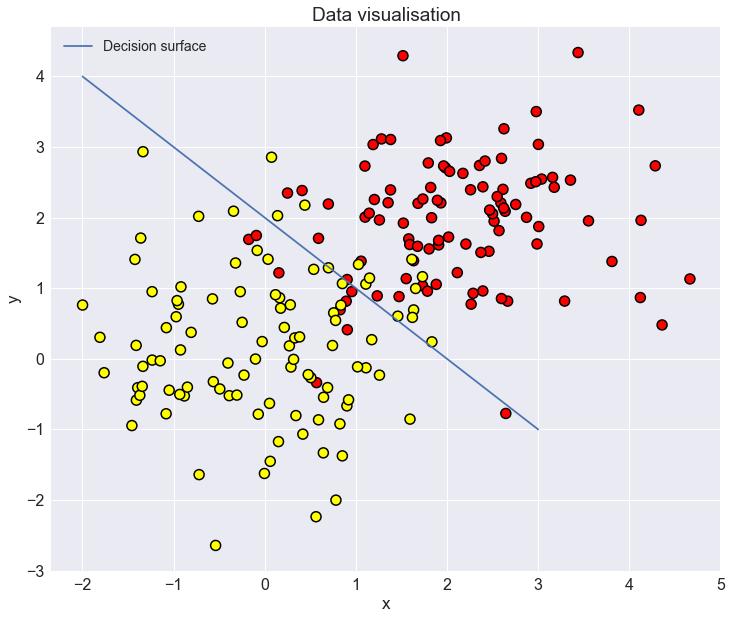

In [7]:
plt.scatter(x=data[:,0], y=data[:,1], s=100, c=labels, cmap='autumn', edgecolors='black', linewidths=1.5)
plt.xlabel('x', size = 17)
plt.ylabel('y', size = 17)
plt.title('Data visualisation', size = 19)
plt.tick_params(axis='both', labelsize = 16)
plt.plot(np.arange(-2,4), np.arange(4,-2,-1),label = 'Decision surface')
plt.legend(fontsize = 14, loc = 'best' )

In [8]:
def get_grid(data, step = 0.01):
    x_min, x_max = data[:,0].min() -1, data[:,1].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min,x_max, step), np.arange(y_min,y_max,step))

In [9]:
xx, yy = get_grid(data, 0.01)

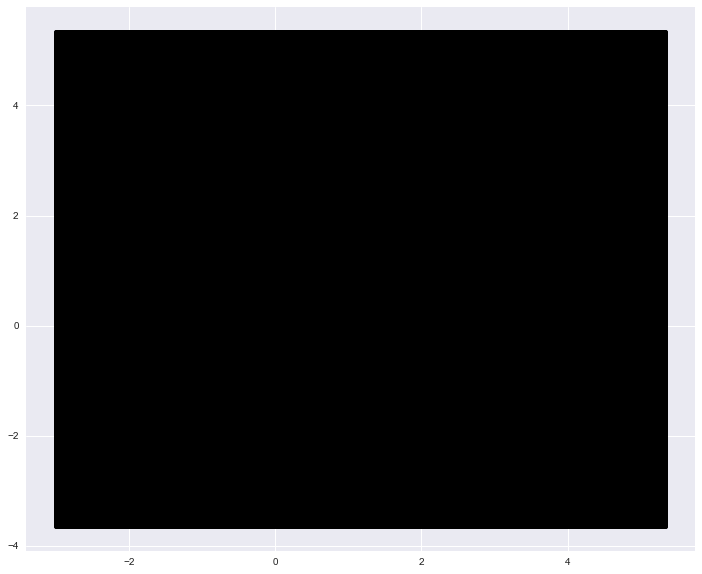

In [10]:
plt.plot(xx, yy, marker = '.', linestyle = 'none', color = 'black', markersize = 10)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth= 3)

In [13]:
clf_tree.fit(X = data, y = labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
data_test = np.c_[xx.ravel(), yy.ravel()]

In [15]:
predicted = clf_tree.predict(data_test).reshape(xx.shape)

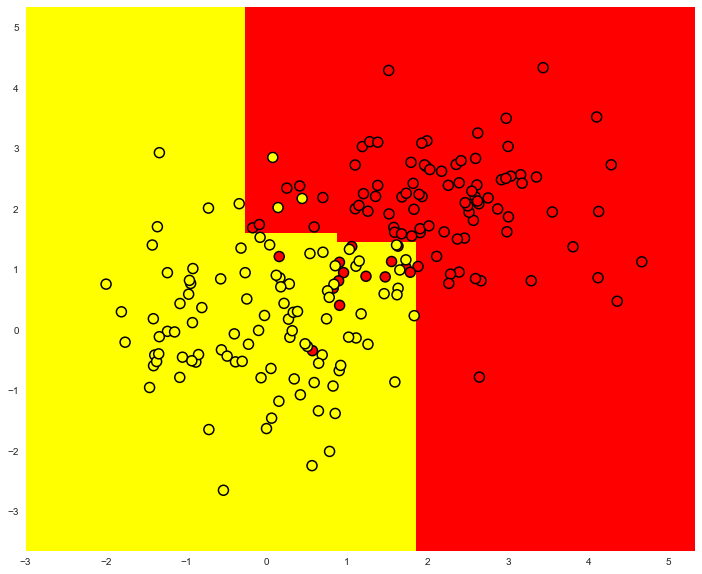

In [16]:
plt.pcolormesh(xx, yy, predicted, cmap = 'autumn')
plt.scatter(x=data[:,0], y=data[:,1], s=100, c=labels, cmap='autumn', edgecolors='black', linewidths=1.5)

In [28]:
os.environ["PATH"] +=  os.pathsep + 'C:\\Users\\user_2018\\Anaconda3\\Library\\bin\\graphviz'

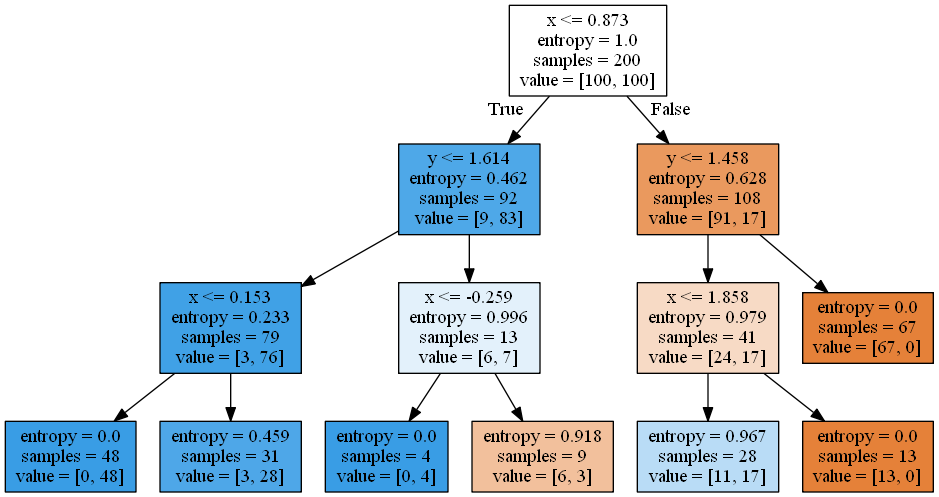

In [39]:
from IPython.display import Image 
import pydotplus
from sklearn import tree
tree.export_graphviz(clf_tree, feature_names=['x', 'y'], out_file='tree.dot', filled=True)
graph = pydotplus.graph_from_dot_file('tree.dot') 
graph.write_png(path='image.png')
Image(graph.create_png())

In [49]:
for node in graph.get_node_list():
    id = node.get_attributes()
    print (id)

{'shape': 'box', 'style': '"filled"', 'color': '"black"'}
{'label': '"x <= 0.873\\nentropy = 1.0\\nsamples = 200\\nvalue = [100, 100]"', 'fillcolor': '"#e5813900"'}
{'label': '"y <= 1.614\\nentropy = 0.462\\nsamples = 92\\nvalue = [9, 83]"', 'fillcolor': '"#399de5e3"'}
{'label': '"x <= 0.153\\nentropy = 0.233\\nsamples = 79\\nvalue = [3, 76]"', 'fillcolor': '"#399de5f5"'}
{'label': '"entropy = 0.0\\nsamples = 48\\nvalue = [0, 48]"', 'fillcolor': '"#399de5ff"'}
{'label': '"entropy = 0.459\\nsamples = 31\\nvalue = [3, 28]"', 'fillcolor': '"#399de5e4"'}
{'label': '"x <= -0.259\\nentropy = 0.996\\nsamples = 13\\nvalue = [6, 7]"', 'fillcolor': '"#399de524"'}
{'label': '"entropy = 0.0\\nsamples = 4\\nvalue = [0, 4]"', 'fillcolor': '"#399de5ff"'}
{'label': '"entropy = 0.918\\nsamples = 9\\nvalue = [6, 3]"', 'fillcolor': '"#e581397f"'}
{'label': '"y <= 1.458\\nentropy = 0.628\\nsamples = 108\\nvalue = [91, 17]"', 'fillcolor': '"#e58139cf"'}
{'label': '"x <= 1.858\\nentropy = 0.979\\nsamples = 

In [50]:
d = {'Возраст':[34, 45, 21, 47], 'Невозврат кретита': [1,0,1,0]}
df = pd.DataFrame(d, index = range(1,5))

In [51]:
df

,Возраст,Невозврат кретита
1,34,1
2,45,0
3,21,1
4,47,0


In [52]:
cl2_tree = DecisionTreeClassifier(random_state=17)

In [54]:
cl2_tree.fit(X=df['Возраст'].values.reshape(-1,1), y=df['Невозврат кретита'].values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

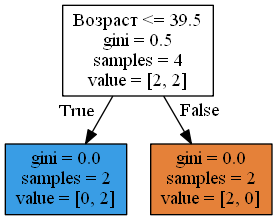

In [56]:
tree.export_graphviz(cl2_tree, feature_names=['Возраст'], out_file='tree.dot', filled=True)
graph = pydotplus.graph_from_dot_file('tree.dot') 
graph.write_png(path='image.png')
Image(graph.create_png())

In [57]:
1 - (2./3)**2 - (1./3)**2

0.4444444444444445

In [58]:
0.75*0.44

0.33

# DecesionTreeRegressor

In [51]:
def generate_data(n_samples, noise = 0.1):
    X = np.random.randn(n_samples,1)
    X.sort(axis = 0)
    Y = np.exp(-X**2) + 1.5*np.exp(-(X - 2)**2) + np.random.normal(0, noise, n_samples).reshape(n_samples,1)
    return X,Y

In [68]:
def f(X):
    return np.exp(-X**2) + 1.5*np.exp(-(X - 2)**2)

In [52]:
X,Y = generate_data(200, 0.06)

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
tree_reg = DecisionTreeRegressor(max_depth=4,min_samples_leaf=5)

In [57]:
tree_reg.fit(X=X, y=Y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [58]:
Y_pred = tree_reg.predict(X=X)

Text(0.5,1,'Decision tree regressor, MSE = 9756.95')

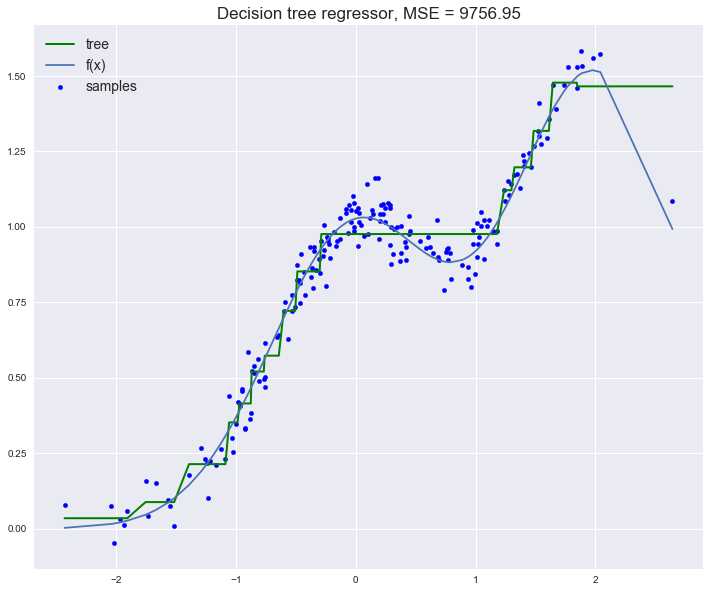

In [76]:
plt.scatter(x=X, y=Y,s=20,label = 'samples', c = 'blue')
plt.plot(X, Y_pred.reshape(200,1), c = 'green', lw = 2, label = 'tree')
plt.plot(X, f(X), label = 'f(x)')
plt.legend(loc = 'best', fontsize = 14)
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((Y - Y_pred) ** 2), size = 17)